In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt



In [15]:
# Load the image in grayscale (you can load a colored image and convert to grayscale if needed)
image = cv2.imread('/home/oem/eliza/DL/project/data/ai-artwork-adam/data/Human_Art_Nouveau_Modern/gustav-klimt_baby-1918.jpg', cv2.IMREAD_GRAYSCALE)


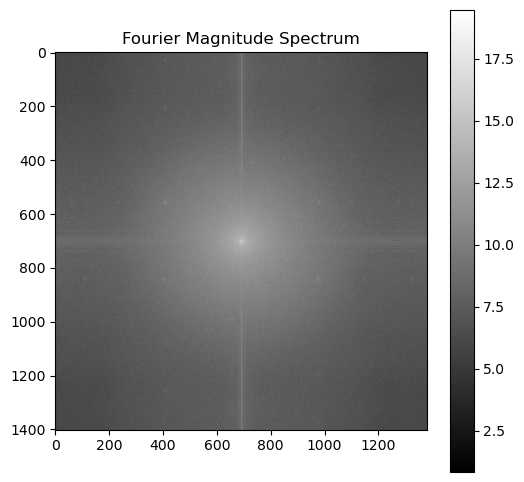

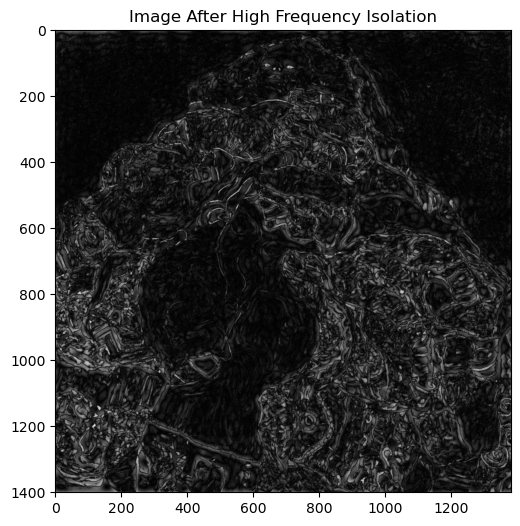

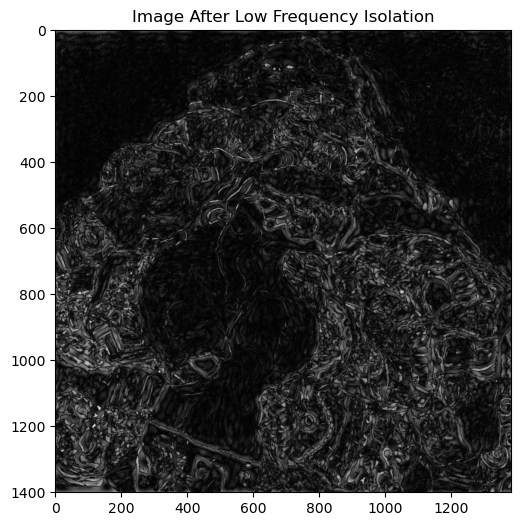

In [16]:
# Perform 2D Fourier Transform
f_transform = np.fft.fft2(image)
f_shifted = np.fft.fftshift(f_transform)  # Shift zero frequency to the center

# Calculate the magnitude spectrum
magnitude_spectrum = np.abs(f_shifted)
magnitude_log = np.log(1 + magnitude_spectrum)

# Display the Fourier magnitude spectrum
plt.figure(figsize=(6,6))
plt.imshow(magnitude_log, cmap='gray')
plt.title("Fourier Magnitude Spectrum")
plt.colorbar()
plt.show()

# High-pass filter to isolate high frequencies (patterns)
rows, cols = image.shape
crow, ccol = rows//2, cols//2
radius = 30  # Define a radius to focus on high frequencies

# Masking low frequencies by zeroing out the low frequency components
f_shifted[crow-radius:crow+radius, ccol-radius:ccol+radius] = 0

# Inverse FFT to reconstruct the image with high frequencies retained
f_ishifted = np.fft.ifftshift(f_shifted)
image_reconstructed_high = np.fft.ifft2(f_ishifted)
image_reconstructed_high = np.abs(image_reconstructed_high)

# Display the reconstructed image after removing low frequencies
plt.figure(figsize=(6,6))
plt.imshow(image_reconstructed_high, cmap='gray')
plt.title("Image After High Frequency Isolation")
plt.show()

# Low-pass filter to isolate low frequencies (smooth gradients)
f_shifted_low = np.fft.fftshift(f_transform)  # Recalculate shift for low-pass
f_shifted_low[crow-radius:crow+radius, ccol-radius:ccol+radius] = 0  # Keep low frequencies

# Inverse FFT to reconstruct the image with low frequencies retained
f_ishifted_low = np.fft.ifftshift(f_shifted_low)
image_reconstructed_low = np.fft.ifft2(f_ishifted_low)
image_reconstructed_low = np.abs(image_reconstructed_low)

# Display the reconstructed image after removing high frequencies
plt.figure(figsize=(6,6))
plt.imshow(image_reconstructed_low, cmap='gray')
plt.title("Image After Low Frequency Isolation")
plt.show()


In [39]:
# Perform 2D Fourier Transform
f_transform = np.fft.fft2(image)
f_shifted = np.fft.fftshift(f_transform)  # Shift zero frequency to the center

# Calculate the magnitude spectrum
magnitude_spectrum = np.abs(f_shifted)

# Calculate the center of mass (centroid) of the magnitude spectrum
rows, cols = image.shape
y, x = np.meshgrid(np.arange(rows), np.arange(cols), indexing='ij')

# Sum over the spectrum to find the center of mass
C_x = np.sum(x * magnitude_spectrum) / np.sum(magnitude_spectrum)
C_y = np.sum(y * magnitude_spectrum) / np.sum(magnitude_spectrum)

print(f"Centroid of Fourier Spectrum: ({C_x}, {C_y})")


Centroid of Fourier Spectrum: (187.00000000000003, 213.96014775253616)
